# Settings

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


In [72]:
sns.set(rc={'figure.figsize':(16, 8)})
#sns.set(font_scale=2)
sns.set_style("whitegrid")

In [3]:
def create_summary(df):
        
    df_summary = (pd.concat([df.dtypes,df.nunique(), df.isnull().sum()], axis=1)
                 .rename(columns={0:'dtypes',1:'nunique',2:'isnull'})
                 .T)
    print(f'Shape: {df.shape}')
   # print(df_summary)
    
    return df_summary

# Data sets

Several datasets together contain information about the user funnel on the site:   
   
    home_page_table.csv
    search_page_table.csv
    payment_page_table.csv
    payment_confirmation_table.csv
    
And there is also a separate table with users:

    user_table.csv

In [4]:
home = pd.read_csv('funnel/home_page_table.csv')
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
search = pd.read_csv('funnel/search_page_table.csv')
search.head()
                

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
payment_page = pd.read_csv('funnel/payment_page_table.csv')
payment_page.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
payment_confirmation = pd.read_csv('funnel/payment_confirmation_table.csv')
payment_confirmation.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [8]:
users = pd.read_csv('funnel/user_table.csv')
users.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [9]:
create_summary(users)

Shape: (90400, 4)


,user_id,date,device,sex
dtypes,int64,object,object,object
nunique,90400,120,2,2
isnull,0,0,0,0


In [10]:
create_summary(home)

Shape: (90400, 2)


,user_id,page
dtypes,int64,object
nunique,90400,1
isnull,0,0


In [11]:
create_summary(search)

Shape: (45200, 2)


,user_id,page
dtypes,int64,object
nunique,45200,1
isnull,0,0


In [12]:
create_summary(payment_page)

Shape: (6030, 2)


,user_id,page
dtypes,int64,object
nunique,6030,1
isnull,0,0


In [13]:
create_summary(payment_confirmation)

Shape: (452, 2)


,user_id,page
dtypes,int64,object
nunique,452,1
isnull,0,0


## Merge

In [14]:
df = users.merge(home, how='left', on='user_id').rename(columns={'page':'home'})
df = df.merge(search, how='left', on='user_id').rename(columns={'page':'search'})
df = df.merge(payment_page, how='left', on='user_id').rename(columns={'page':'payment_page'})
df = df.merge(payment_confirmation, how='left', on='user_id').rename(columns={'page':'payment_confirmation'})

In [15]:
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

In [16]:
df

,user_id,device,sex,home,search,payment_page,payment_confirmation
date,,,,,,,
2015-02-28,450007,Desktop,Female,home_page,NaN,NaN,NaN
2015-01-13,756838,Desktop,Male,home_page,NaN,NaN,NaN
2015-04-09,568983,Desktop,Male,home_page,search_page,NaN,NaN
2015-02-18,190794,Desktop,Female,home_page,search_page,NaN,NaN
2015-01-15,537909,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-03-30,307667,Desktop,Female,home_page,NaN,NaN,NaN
2015-02-08,642989,Desktop,Female,home_page,search_page,NaN,NaN
2015-04-13,659645,Desktop,Male,home_page,search_page,NaN,NaN


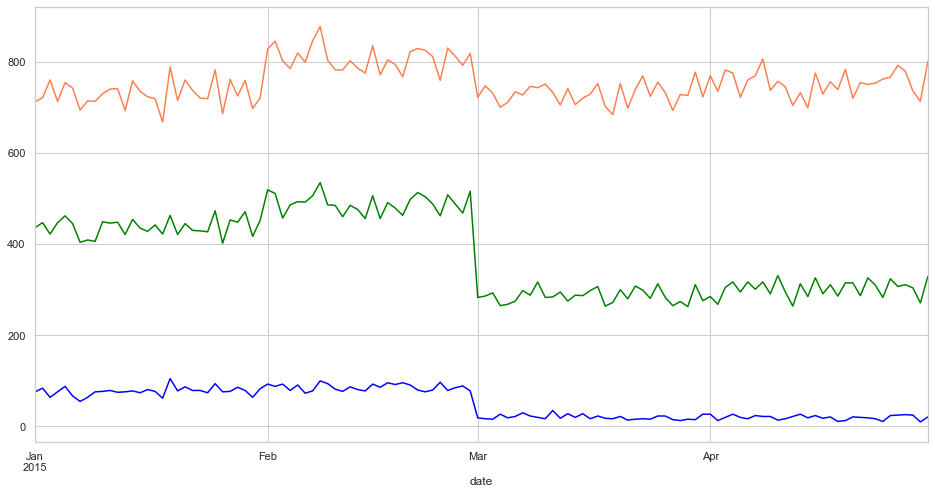

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

ax = df['home'].resample('D').count().plot(c='coral')
ax = df['search'].resample('D').count().plot(c='green')
ax = df['payment_page'].resample('D').count().plot(c='blue')
#ax = df['payment_confirmation'].resample('D').count().plot(c='red')

In [43]:
df_agg = df.groupby(['device'])\
            .resample('D')\
            .agg({'home':'count',
                  'search':'count',
                  'payment_page':'count',
                  'payment_confirmation':'count'})\
            .reset_index(level=[0,1])

In [19]:
df_agg

,device,date,home,search,payment_page,payment_confirmation
0,Desktop,2015-01-01,493,256,47,1
1,Desktop,2015-01-02,484,261,44,1
2,Desktop,2015-01-03,507,222,22,3
3,Desktop,2015-01-04,474,249,38,1
4,Desktop,2015-01-05,483,249,37,3
...,...,...,...,...,...,...
235,Mobile,2015-04-26,263,48,12,0
236,Mobile,2015-04-27,270,55,16,1
237,Mobile,2015-04-28,260,54,16,1
238,Mobile,2015-04-29,260,52,6,0


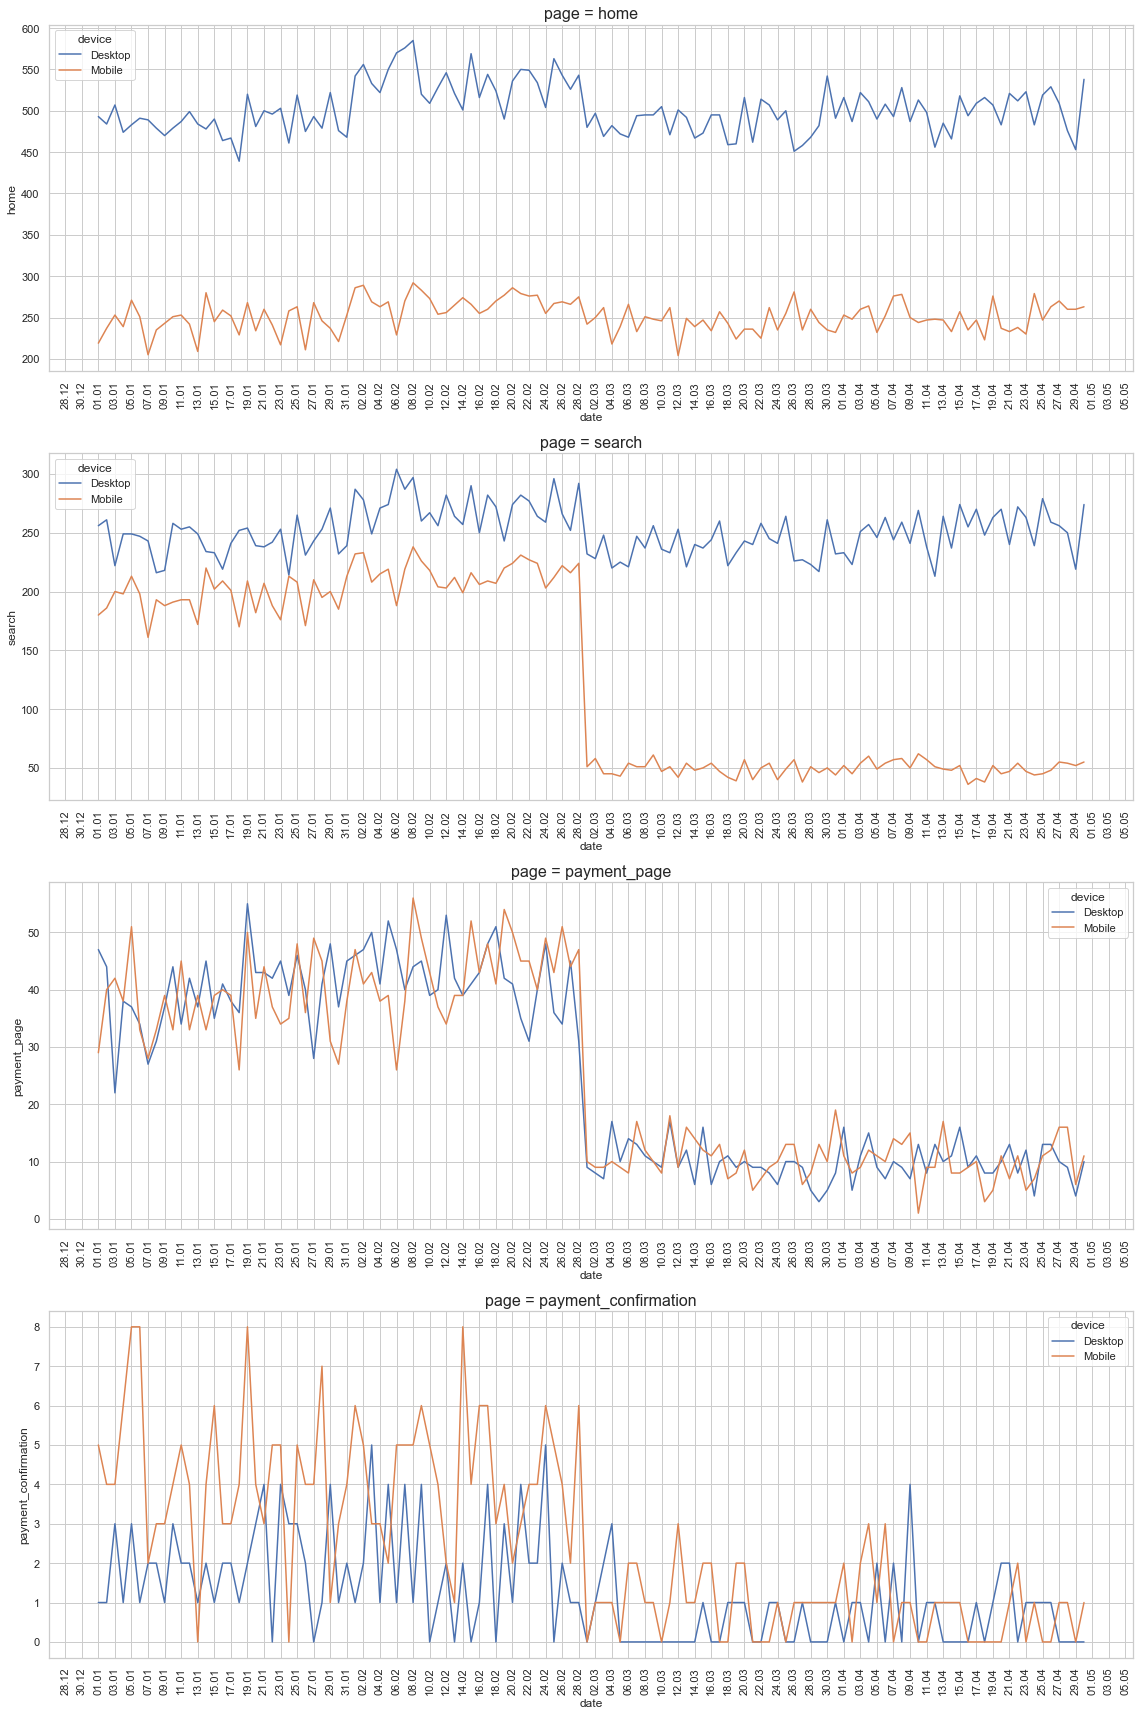

In [20]:
pages = df_agg.columns[2:]

fig, axs = plt.subplots(4,1, figsize=(16,24))


for i, ax in enumerate(axs.flatten()): 
    sns.lineplot(data=df_agg, x='date', y=pages[i], hue='device', ax=ax)
    
    ax.set_title(f'page = {pages[i]}', fontsize=16)
    
    ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout();

На страницах Search  и Payment Page 1 марта произошел какой-то сбой. Причем на  Search этот сбой прошел только для Mobile devices, на на странице Payment Page изменения затронуи уже оба вида devices, т.е. для Mobile devices это коллективная аномалия, для 

Payment confirmation помимо точечных анамолий (например 22.01 и 27.01, когда кол=во оплат упало до нуля.) Но данных мало и кол-во оплат в день тоже мало, вполне возмножно, что отсутсвие оплат вообще за день является вариантом нормы. В данном случае нужно отловить контексную аномалию,когда отсутсви оплат длится более 1 дня (например с 05.03 по 14.03)

декомпозия для удаления аномалий для предпроцессинга для треннинга модели

# Conversion

In [42]:
df_agg

,device,home,search,payment_page,payment_confirmation,C1,C2,C3
date,,,,,,,,
2015-01-01,Desktop,493,256,47,1,51.926978,18.359375,2.127660
2015-01-02,Desktop,484,261,44,1,53.925620,16.858238,2.272727
2015-01-03,Desktop,507,222,22,3,43.786982,9.909910,13.636364
2015-01-04,Desktop,474,249,38,1,52.531646,15.261044,2.631579
2015-01-05,Desktop,483,249,37,3,51.552795,14.859438,8.108108
...,...,...,...,...,...,...,...,...
2015-04-26,Mobile,263,48,12,0,18.250951,25.000000,0.000000
2015-04-27,Mobile,270,55,16,1,20.370370,29.090909,6.250000
2015-04-28,Mobile,260,54,16,1,20.769231,29.629630,6.250000


In [23]:
df_agg.date.min(), df_agg.date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-04-30 00:00:00'))

На данном этапе нам надо отслеживать количествр лидов на home page, и потом контролировать конверсию на каждом этапе.


In [46]:
df_agg['C1'] = df_agg['search'] / df_agg['home'] *100
df_agg['C2'] = df_agg['payment_page'] / df_agg['search'] *100
df_agg['C3'] = df_agg['payment_confirmation'] / df_agg['payment_page'] *100

<AxesSubplot:xlabel='date', ylabel='C1'>

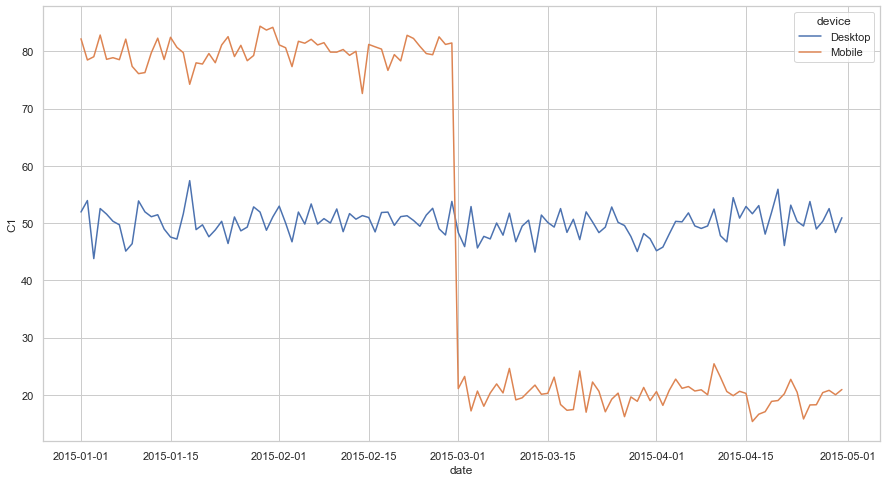

In [48]:
sns.lineplot(data=df_agg, x='date', y='C1', hue='device')

<AxesSubplot:xlabel='date', ylabel='C2'>

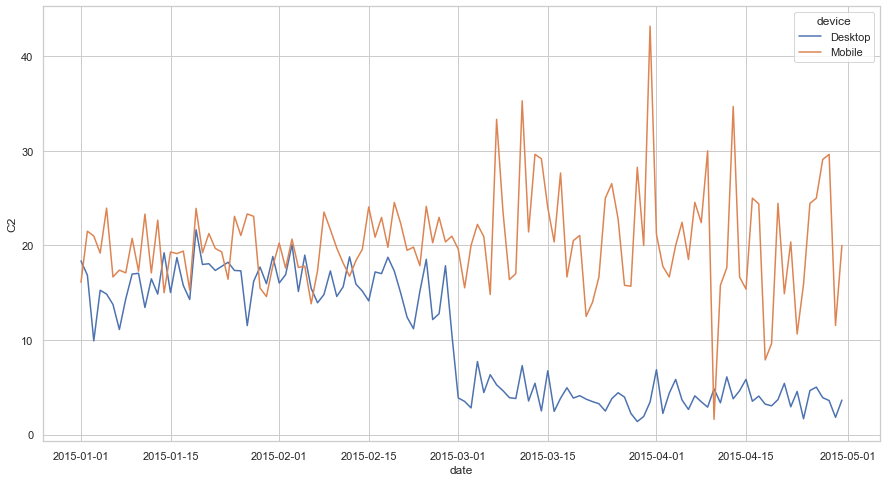

In [49]:
sns.lineplot(data=df_agg, x='date', y='C2', hue='device')

<AxesSubplot:xlabel='date', ylabel='C3'>

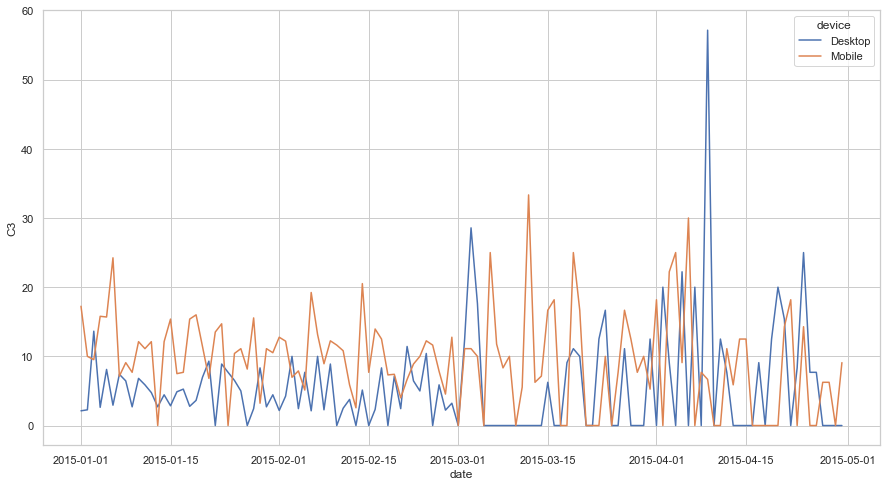

In [50]:
sns.lineplot(data=df_agg, x='date', y='C3', hue='device')

Чтобы отследить возможные поломки на сайте и понять,на каком уровне возникла проблема, нам нужно на home page отслеживать абсолютные цифры пользователей, а далее по воронке котролировать конверсию. Тогда поломка на  home page и сокращение лидов не станет алертом на остальных уровнях,т.е. наш алерт позволит точно понять, на каком уровне возникла проблема.

Сезонность, пики и тренд теоритически должны совпадать, поэтому попробуем подобрать модель, которая хорошо предсказывает поведение ряда на home page. Тогда эту же модель можно будет попробовать использовать для детектирования аномалий на нижних уровнях.

# First Model

<AxesSubplot:xlabel='date'>

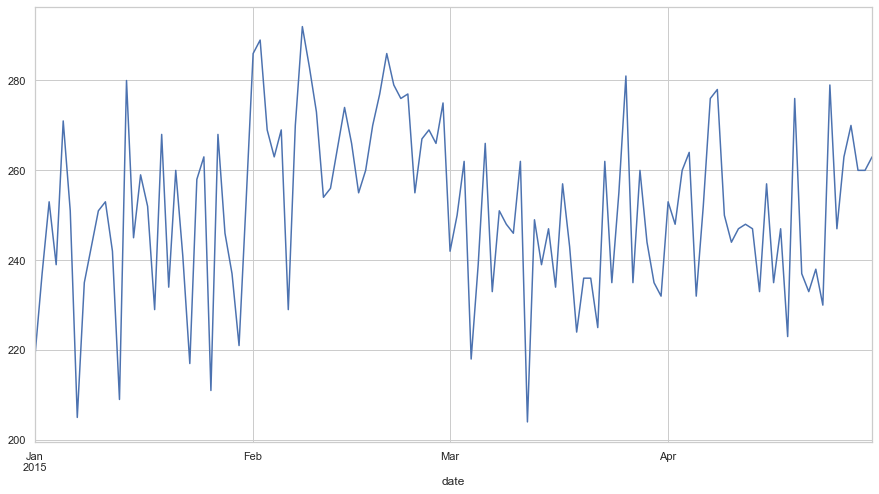

In [62]:
df_mobile = df_agg[df_agg['device']=='Mobile'].set_index('date')
df_mobile['home'].plot()

## Smoothing window

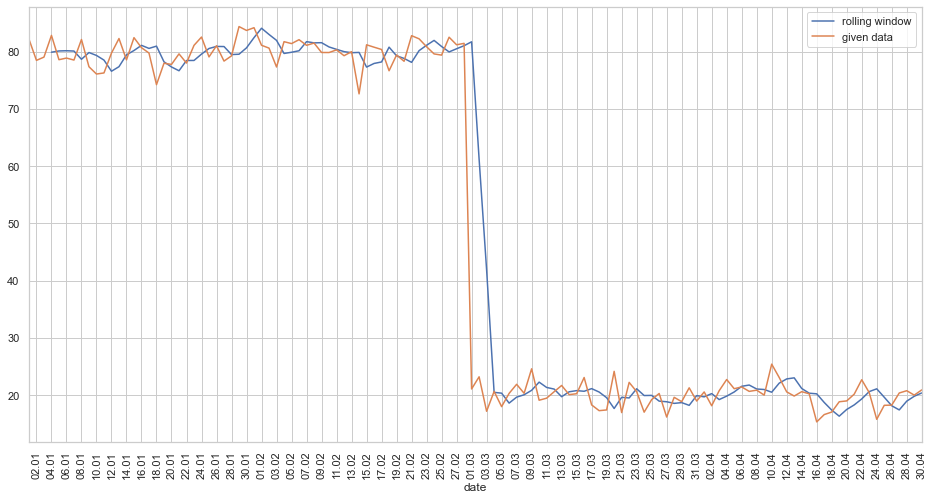

In [83]:
fig, ax = plt.subplots()

ax = df_mobile['C1'].rolling(3, closed='left').mean().plot(label='rolling window')
ax = df_mobile['C1'].plot(label='given data')
plt.legend()


ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)


# seasonal_decompose

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [276]:
resalt_decomp = seasonal_decompose(x=df_mobile['home'], model='additive', filt=None, period=7, two_sided=False, extrapolate_trend=0)

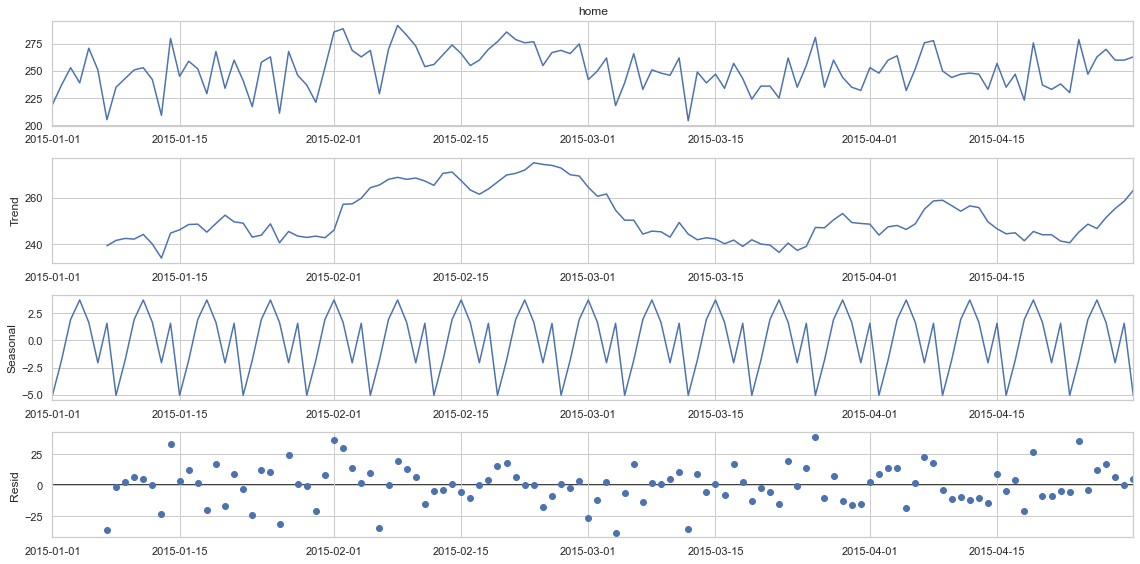

In [277]:
resalt_decomp.plot();

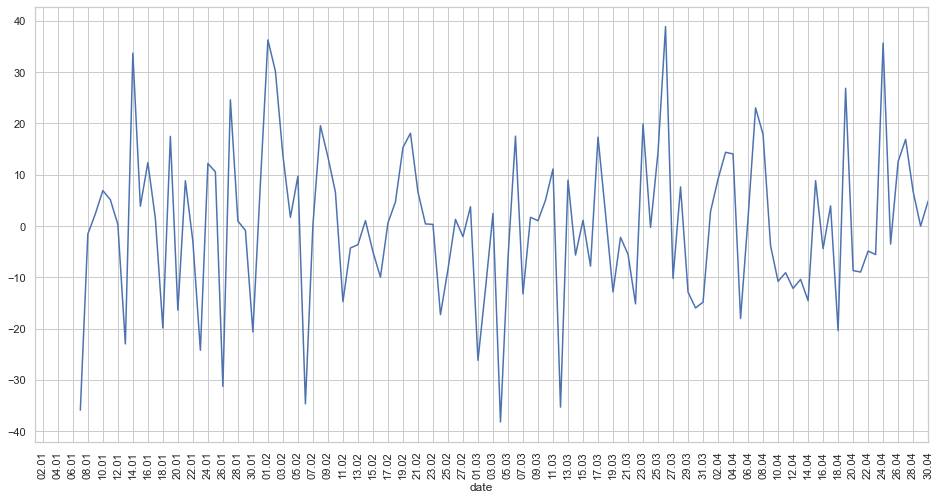

In [278]:
fig, ax = plt.subplots()

resalt_decomp.resid.plot()

ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)

In [279]:
resalt_decomp.resid.tail(10)

date
2015-04-21    -8.955807
2015-04-22    -4.863896
2015-04-23    -5.544568
2015-04-24    35.669193
2015-04-25    -3.500450
2015-04-26    12.570978
2015-04-27    16.910264
2015-04-28     6.758478
2015-04-29    -0.006753
2015-04-30     4.884004
Name: resid, dtype: float64

<AxesSubplot:>

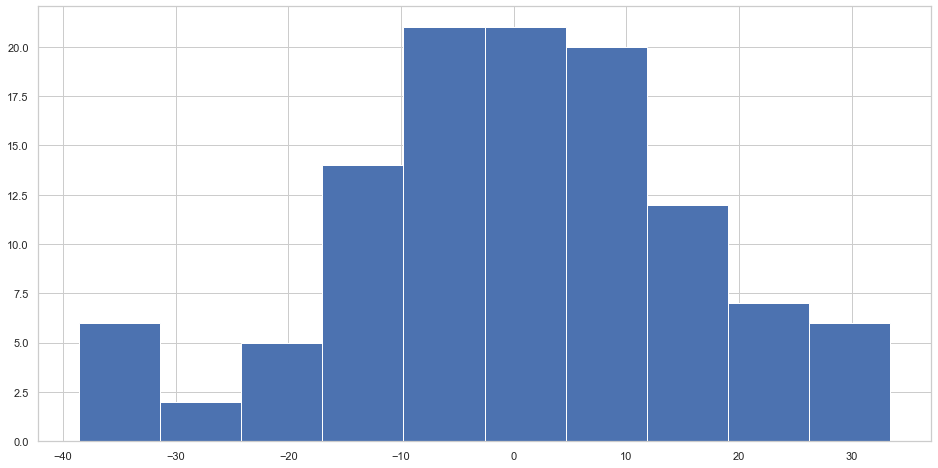

In [274]:
resalt_decomp.resid.hist()

# 99,7 Percentile of residual

In [124]:
stats = df_mobile.groupby('device')['home'].agg(['mean', 'count', 'std'])

In [125]:
print(stats)
print('-'*30)

              mean  count        std
device                              
Mobile  251.666667    120  18.958749
------------------------------


In [128]:
df_mobile_home = df_mobile[['home']]

In [129]:
resalt_decomp.resid

date
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04    -3.492572
2015-01-05    26.650285
                ...    
2015-04-26     1.364571
2015-04-27     4.078857
2015-04-28          NaN
2015-04-29          NaN
2015-04-30          NaN
Name: resid, Length: 120, dtype: float64

In [137]:
resalt_decomp.resid.quantile(.99)

31.308058223289326

In [227]:
def func(x):
    if abs(x) > abs(resalt_decomp.resid.quantile(.997)):
        y = 'out'
    else:
        y = 'norma'
    return y

alert = resalt_decomp.resid.apply(lambda x: func(x))

In [228]:
resalt_decomp.resid.quantile(.99)

31.308058223289326

In [229]:
resid = pd.DataFrame({'resid':resalt_decomp.resid,'alert':alert})
resid

,resid,alert
date,,
2015-01-01,NaN,norma
2015-01-02,NaN,norma
2015-01-03,NaN,norma
2015-01-04,-3.492572,norma
2015-01-05,26.650285,norma
...,...,...
2015-04-26,1.364571,norma
2015-04-27,4.078857,norma
2015-04-28,NaN,norma


In [230]:
resid.loc[resid['alert']=='out']

,resid,alert
date,,
2015-01-07,-38.597614,out
2015-01-13,-37.329757,out
2015-01-26,-34.635429,out
2015-01-30,-34.454757,out
2015-02-06,-37.169043,out
2015-03-26,33.429172,out


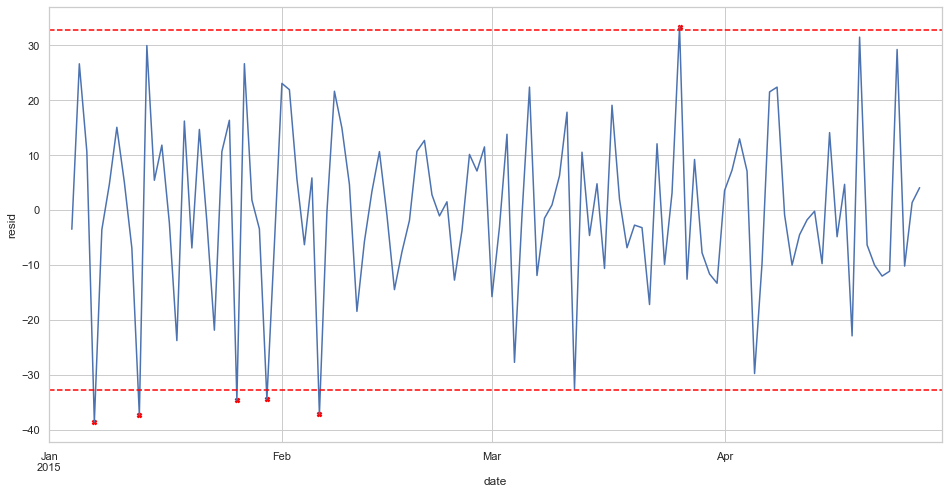

In [232]:
fig, ax = plt.subplots()

ax = resid.resid.plot()

resid_alert = resid.loc[resid['alert']=='out'].reset_index()
resid_alert.plot(x ='date', y='resid',kind='scatter',c='red', marker='X', ax=ax)
ax.axhline(resalt_decomp.resid.quantile(.997),c='red', linestyle='--')
ax.axhline(-resalt_decomp.resid.quantile(.997),c='red', linestyle='--')

In [189]:
df_mobile_home_alert= df_mobile_home.merge(resid_alert.set_index('date')['alert'], how='left', left_index=True, right_index=True)

In [233]:
df_mobile_home_alert['home'].quantile(.997)

def func(x):
    if abs(x) > abs(df_mobile_home_alert['home'].quantile(.997)):
        y = 'out'
    else:
        y = 'norma'
    return y

df_mobile_home_alert['alert_raw'] = df_mobile_home_alert.home.apply(lambda x: func(x))

In [234]:
df_mobile_home_alert.loc[(df_mobile_home_alert['alert']=='out') | (df_mobile_home_alert['alert_raw']=='out')]

,home,alert,alert_raw
date,,,
2015-01-07,205,out,norma
2015-01-13,209,out,norma
2015-01-26,211,out,norma
2015-01-30,221,out,norma
2015-02-06,229,out,norma
2015-02-08,292,NaN,out
2015-03-12,204,out,norma
2015-03-26,281,out,norma
2015-04-19,276,out,norma


<AxesSubplot:xlabel='date', ylabel='home'>

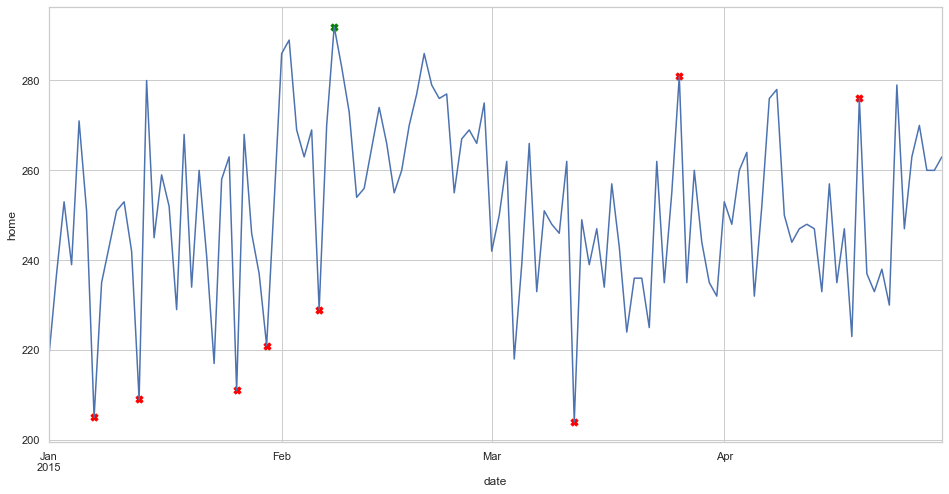

In [235]:
fig, ax = plt.subplots()

df_mobile_home['home'].plot()
df_mobile_home_alert.query('alert=="out"').reset_index().plot(x='date',y='home',kind='scatter', ax=ax, c='red', marker='X',s=50)
df_mobile_home_alert.query('alert_raw=="out"').reset_index().plot(x='date',y='home',kind='scatter', ax=ax, c='green',marker='X',s=50)

# Simulation

Такой способ отлавливает резкие колебания ряда, имеет ли это смысл в данном случае- зависит от специфики бизнеса. 

Сделаем симуляцию реального мониторинга. Возьмем данные с января по февраль как нормальные и будем проверять каждый новый  новый день на аномальность.

In [426]:
cutoff = '2015-02-28'
data_range  = pd.date_range(start=cutoff, periods=60, freq='D')
alert_list = [False for i in range(len(df_mobile_home[:cutoff]))]

for date in data_range:
    #print(date)
    resalt_decomp = seasonal_decompose(x=df_mobile_home[:date]['home'], model='additive', period=7,two_sided=False)
    q_003 = resalt_decomp.resid.quantile(0.01)
    q_997 = resalt_decomp.resid.quantile(0.997)
   # print(q_997)
    
    control_date = date + pd.Timedelta('1 day')
    resalt_decomp = seasonal_decompose(x=df_mobile_home[:control_date]['home'], model='additive', period=7,two_sided=False)
    
   # print(resalt_decomp.resid.values[-1])
    
    if  (resalt_decomp.resid.values[-1]  > q_997) or (resalt_decomp.resid.values[-1] < q_003):
        alert = True
        count_users = df_mobile_home[control_date:control_date]["home"].iloc[0]
        date_alert = control_date
        print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} count of Users = {count_users}")
    else:
        alert = False
    alert_list.append(alert)
    #print(control_date.strftime('%d-%m'),q_003, q_997, resalt_decomp.resid.values[-1], df_mobile_home[control_date:control_date]["home"].iloc[0])
    
df_mobile_home_plot = df_mobile_home[:control_date].copy()
df_mobile_home_plot['alert'] = alert_list

!!!!ALERT!!!! 04-03-2015 count of Users = 218
!!!!ALERT!!!! 12-03-2015 count of Users = 204
!!!!ALERT!!!! 26-03-2015 count of Users = 281


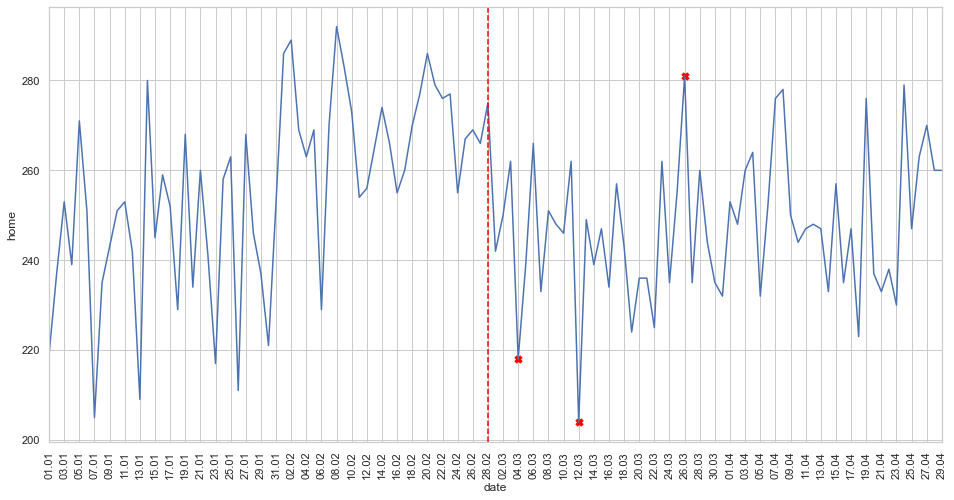

In [427]:
fig, ax = plt.subplots()

df_mobile_home_plot['home'].plot(ax=ax)
df_mobile_home_plot.query('alert==True').reset_index().plot(x='date',y='home',kind='scatter', ax=ax, c='red', marker='X',s=50)
ax.axvline(cutoff, c='red', linestyle='--')

ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)

# For C1, C2,C3

In [442]:
cutoff = '2015-02-28'
data_range  = pd.date_range(start=cutoff, periods=30, freq='D')
alert_list = [False for i in range(len(df_mobile[:cutoff]['C1']))]

for date in data_range:
    #print(date)
    resalt_decomp = seasonal_decompose(x=df_mobile[:date]['C1'], model='additive', period=7,two_sided=False)
    q_low = resalt_decomp.resid.quantile(0.01)
    q_high = resalt_decomp.resid.quantile(0.997)
   # print(q_997)
    
    control_date = date + pd.Timedelta('1 day')
    resalt_decomp = seasonal_decompose(x=df_mobile[:control_date]['C1'], model='additive', period=7,two_sided=False)
    
   # print(resalt_decomp.resid.values[-1])
    
    if  (resalt_decomp.resid.values[-1]  > q_high) or (resalt_decomp.resid.values[-1] < q_low):
        alert = True
        count_users = df_mobile_home[control_date:control_date]["C1"].iloc[0]
        date_alert = control_date
        print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} count of Users = {count_users}")
    else:
        alert = False
    alert_list.append(alert)
    #print(control_date.strftime('%d-%m'),q_003, q_997, resalt_decomp.resid.values[-1], df_mobile_home[control_date:control_date]["home"].iloc[0])
    
df_mobile_plot = df_mobile[:control_date].copy()
df_mobile_plot['alert'] = alert_list

KeyError: 'C1'

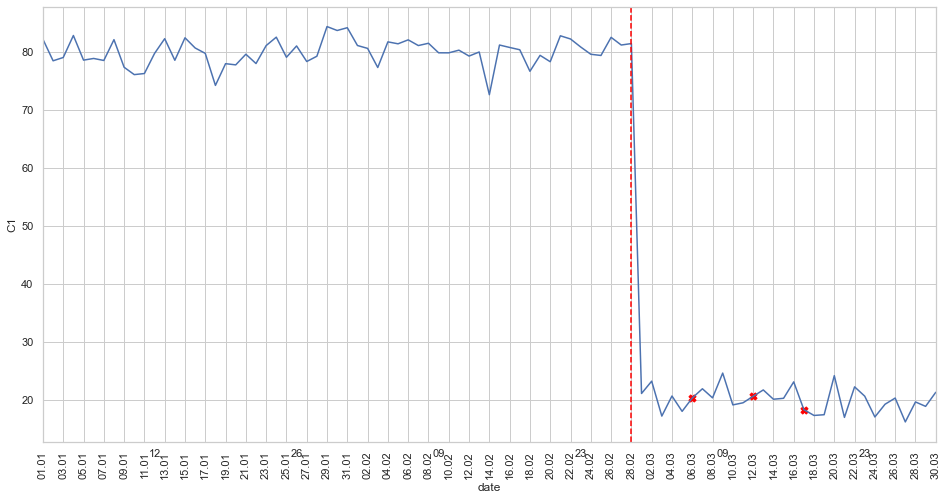

In [443]:
fig, ax = plt.subplots()

df_mobile_plot['C1'].plot(ax=ax)
df_mobile_plot.query('alert==True').reset_index().plot(x='date',y='C1',kind='scatter', ax=ax, c='red', marker='X',s=50)
ax.axvline(cutoff, c='red', linestyle='--')

ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)

In [446]:
cutoff = '2015-02-28'
data_range  = pd.date_range(start=cutoff, periods=30, freq='D')
alert_list = [False for i in range(len(df_mobile[:cutoff]['C2']))]

for date in data_range:
    #print(date)
    resalt_decomp = seasonal_decompose(x=df_mobile[:date]['C2'], model='additive', period=7,two_sided=False)
    q_low = resalt_decomp.resid.quantile(0.01)
    q_high = resalt_decomp.resid.quantile(0.997)
   # print(q_997)
    
    control_date = date + pd.Timedelta('1 day')
    resalt_decomp = seasonal_decompose(x=df_mobile[:control_date]['C2'], model='additive', period=7,two_sided=False)
    
   # print(resalt_decomp.resid.values[-1])
    
    if  (resalt_decomp.resid.values[-1]  > q_high) or (resalt_decomp.resid.values[-1] < q_low):
        alert = True
        count_users = df_mobile[control_date:control_date]["C2"].iloc[0]
        date_alert = control_date
        print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} count of Users = {count_users}")
    else:
        alert = False
    alert_list.append(alert)
    #print(control_date.strftime('%d-%m'),q_003, q_997, resalt_decomp.resid.values[-1], df_mobile_home[control_date:control_date]["home"].iloc[0])
    
df_mobile_plot = df_mobile[:control_date].copy()
df_mobile_plot['alert'] = alert_list

!!!!ALERT!!!! 02-03-2015 count of Users = 15.517241379310345
!!!!ALERT!!!! 07-03-2015 count of Users = 33.33333333333333
!!!!ALERT!!!! 10-03-2015 count of Users = 17.02127659574468
!!!!ALERT!!!! 11-03-2015 count of Users = 35.294117647058826
!!!!ALERT!!!! 18-03-2015 count of Users = 16.666666666666664
!!!!ALERT!!!! 21-03-2015 count of Users = 12.5


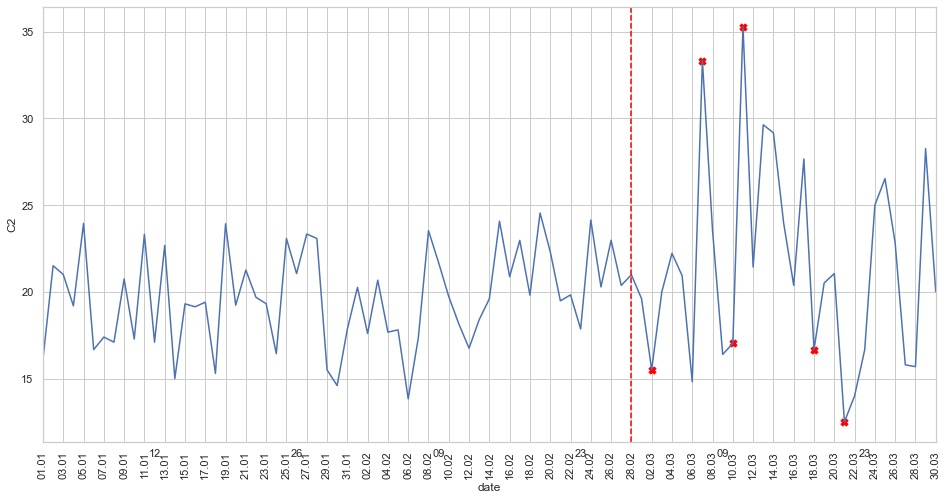

In [447]:
fig, ax = plt.subplots()

df_mobile_plot['C2'].plot(ax=ax)
df_mobile_plot.query('alert==True').reset_index().plot(x='date',y='C2',kind='scatter', ax=ax, c='red', marker='X',s=50)
ax.axvline(cutoff, c='red', linestyle='--')

ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)

In [448]:
cutoff = '2015-02-28'
data_range  = pd.date_range(start=cutoff, periods=30, freq='D')
alert_list = [False for i in range(len(df_mobile[:cutoff]['C3']))]

for date in data_range:
    #print(date)
    resalt_decomp = seasonal_decompose(x=df_mobile[:date]['C3'], model='additive', period=7,two_sided=False)
    q_low = resalt_decomp.resid.quantile(0.01)
    q_high = resalt_decomp.resid.quantile(0.997)
   # print(q_997)
    
    control_date = date + pd.Timedelta('1 day')
    resalt_decomp = seasonal_decompose(x=df_mobile[:control_date]['C3'], model='additive', period=7,two_sided=False)
    
   # print(resalt_decomp.resid.values[-1])
    
    if  (resalt_decomp.resid.values[-1]  > q_high) or (resalt_decomp.resid.values[-1] < q_low):
        alert = True
        count_users = df_mobile[control_date:control_date]["C3"].iloc[0]
        date_alert = control_date
        print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} count of Users = {count_users}")
    else:
        alert = False
    alert_list.append(alert)
    #print(control_date.strftime('%d-%m'),q_003, q_997, resalt_decomp.resid.values[-1], df_mobile_home[control_date:control_date]["home"].iloc[0])
    
df_mobile_plot = df_mobile[:control_date].copy()
df_mobile_plot['alert'] = alert_list

!!!!ALERT!!!! 06-03-2015 count of Users = 25.0
!!!!ALERT!!!! 12-03-2015 count of Users = 33.33333333333333
!!!!ALERT!!!! 17-03-2015 count of Users = 0.0


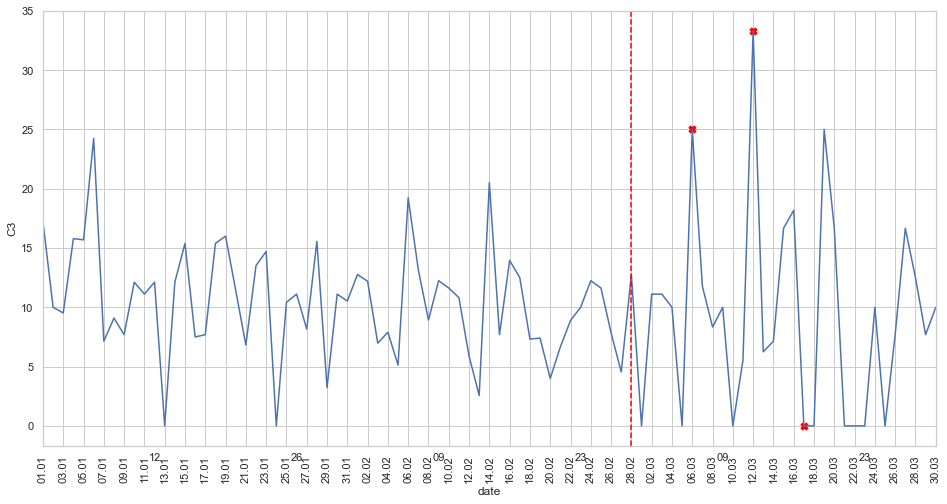

In [449]:
fig, ax = plt.subplots()

df_mobile_plot['C3'].plot(ax=ax)
df_mobile_plot.query('alert==True').reset_index().plot(x='date',y='C3',kind='scatter', ax=ax, c='red', marker='X',s=50)
ax.axvline(cutoff, c='red', linestyle='--')

ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='x', labelrotation=90)

# Funktion

In [456]:
cutoff = '2015-02-28'
data_range  = pd.date_range(start=cutoff, periods=30, freq='D')
alert_list = [False for i in range(len(df_mobile[:cutoff]['C3']))]

for date in data_range:
    #print(date)
    resalt_decomp = seasonal_decompose(x=df_mobile[:date]['C3'], model='additive', period=7,two_sided=False)
    q_low = resalt_decomp.resid.quantile(0.01)
    q_high = resalt_decomp.resid.quantile(0.997)
   # print(q_997)
    
    control_date = date + pd.Timedelta('1 day')
    resalt_decomp = seasonal_decompose(x=df_mobile[:control_date]['C3'], model='additive', period=7,two_sided=False)
    
    # print(resalt_decomp.resid.values[-1])
    
    if  (resalt_decomp.resid.values[-1]  > q_high) or (resalt_decomp.resid.values[-1] < q_low):
        alert = True
        count_users = df_mobile[control_date:control_date]["C3"].iloc[0]
        date_alert = control_date
        print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} count of Users = {count_users}")
    else:
        alert = False
    alert_list.append(alert)
    #print(control_date.strftime('%d-%m'),q_003, q_997, resalt_decomp.resid.values[-1], df_mobile_home[control_date:control_date]["home"].iloc[0])
    
df_mobile_plot = df_mobile[:control_date].copy()
df_mobile_plot['alert'] = alert_list

!!!!ALERT!!!! 06-03-2015 count of Users = 25.0
!!!!ALERT!!!! 12-03-2015 count of Users = 33.33333333333333
!!!!ALERT!!!! 17-03-2015 count of Users = 0.0


In [518]:
def detection_anomaly(data, metric, cutoff, periods, q_low= 0.01, q_high=0.997):
    
    # create a date range in which we will run the simulation
    data_range  = pd.date_range(start=cutoff, periods=periods, freq='D')
    
    # create a list without alerts for the base historical period 
    alert_list = [False for i in range(len(data[:cutoff][metric]))]
    
    for date in data_range:
        # calculate a residual for the base period and its quartiles
        result_decomp = seasonal_decompose(x=data[:date][metric], model='additive', period=7,two_sided=False)
        bound_low =  result_decomp.resid.quantile(q_low)
        bound_high = result_decomp.resid.quantile(q_high)
        #print(date, bound_low, bound_high)
        
        # 1 day shift for 'today' simulation 
        control_date = date + pd.Timedelta('1 day')
        
        #calculate a resudial for new period (included 'today')
        resalt_decomp = seasonal_decompose(x=data[:control_date][metric], model='additive', period=7,two_sided=False)
        
        if  (resalt_decomp.resid.values[-1]  > bound_high) or (resalt_decomp.resid.values[-1] < bound_low):
            alert = True
            value_metric = data[control_date:control_date][metric].iloc[0]
            date_alert = control_date
            print( f"!!!!ALERT!!!! {date_alert.strftime('%d-%m-%Y')} metric = {value_metric}")
        
        else:
            alert = False
        alert_list.append(alert)
        
        data_plot = data[:control_date].copy()
        data_plot['alert'] = alert_list
        
    fig, ax = plt.subplots()

    data_plot[metric].plot(ax=ax)
    data_plot.query('alert==True').reset_index().plot(x='date', y=metric, kind='scatter', ax=ax, c='red', marker='X',s=70)
    ax.axvline(cutoff, c='red', linestyle='--')
    
    ax.xaxis.set_major_formatter(DateFormatter("%d.%m"))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.tick_params(axis='x', labelrotation=90)
    
    plt.title(f'metric = {metric}', fontsize=20)

!!!!ALERT!!!! 04-03-2015 metric = 218
!!!!ALERT!!!! 12-03-2015 metric = 204
!!!!ALERT!!!! 26-03-2015 metric = 281
!!!!ALERT!!!! 01-03-2015 metric = 21.074380165289256
!!!!ALERT!!!! 02-03-2015 metric = 23.200000000000003
!!!!ALERT!!!! 02-03-2015 metric = 15.517241379310345
!!!!ALERT!!!! 07-03-2015 metric = 33.33333333333333
!!!!ALERT!!!! 10-03-2015 metric = 17.02127659574468
!!!!ALERT!!!! 11-03-2015 metric = 35.294117647058826
!!!!ALERT!!!! 18-03-2015 metric = 16.666666666666664
!!!!ALERT!!!! 21-03-2015 metric = 12.5
!!!!ALERT!!!! 06-03-2015 metric = 25.0
!!!!ALERT!!!! 12-03-2015 metric = 33.33333333333333
!!!!ALERT!!!! 17-03-2015 metric = 0.0


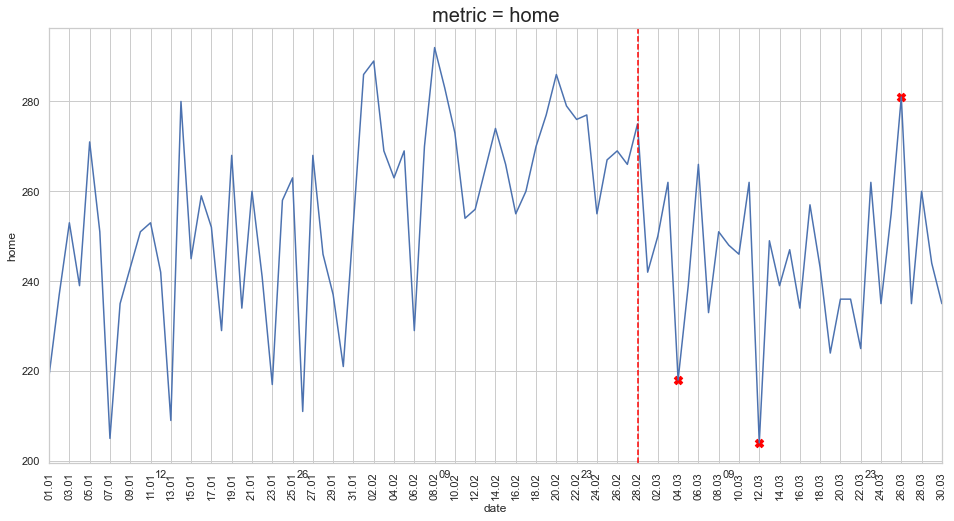

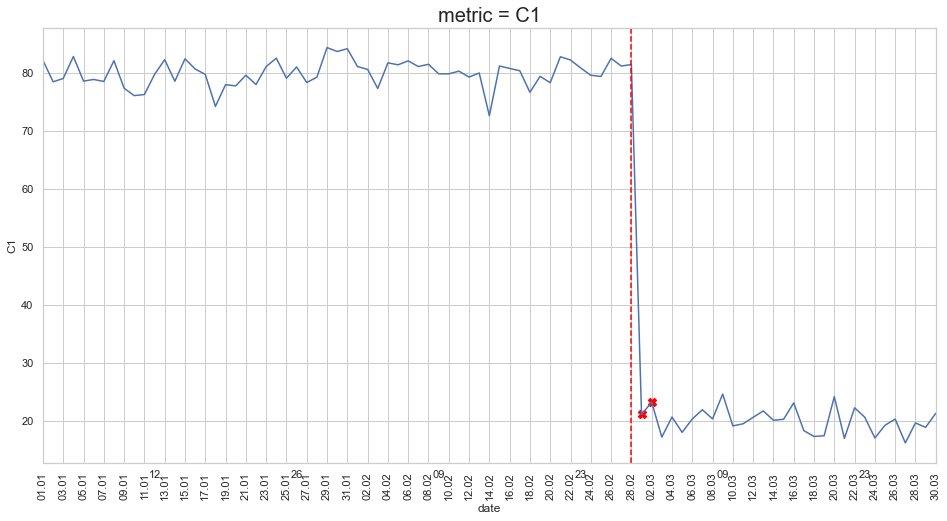

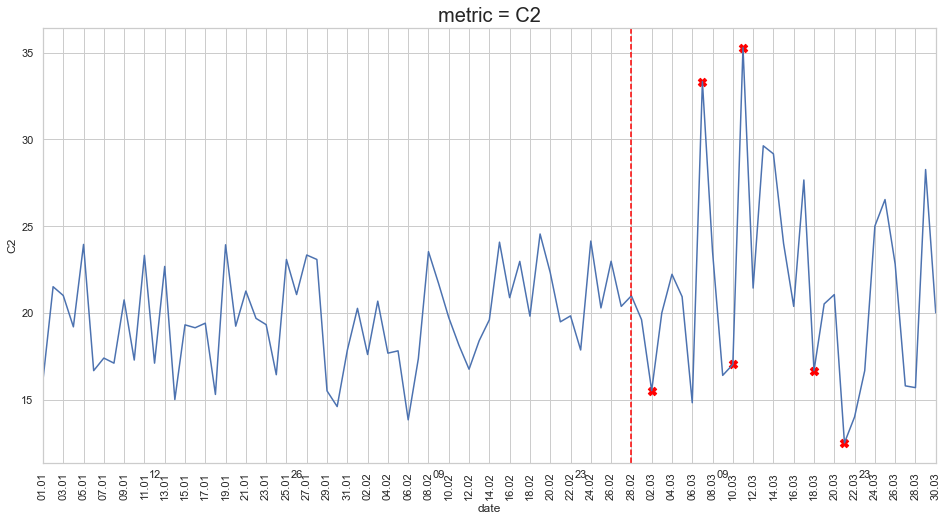

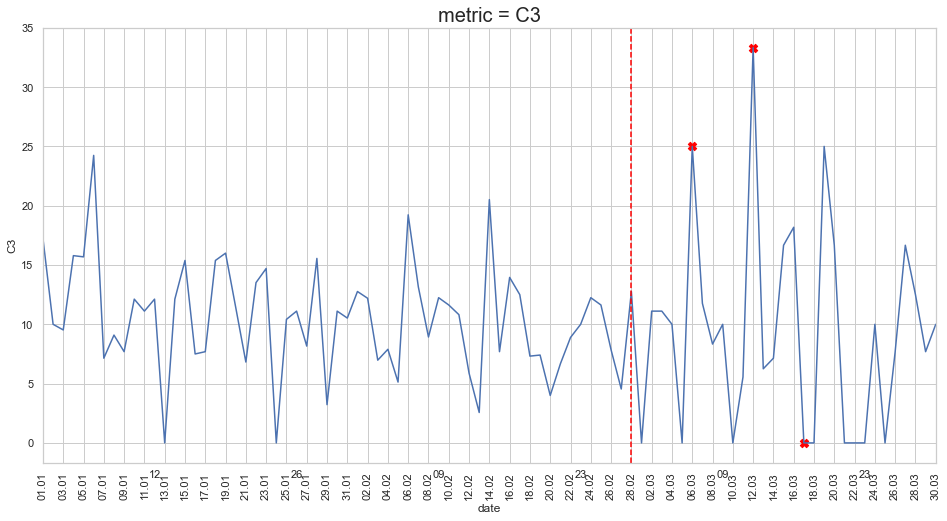

In [521]:
metrics = ['home','C1','C2','C3']
for metric in metrics:
    detection_anomaly(data=df_mobile, metric=metric, periods=30, cutoff='2015-02-28')

!!!!ALERT!!!! 01-03-2015 metric = 480
!!!!ALERT!!!! 30-03-2015 metric = 542
!!!!ALERT!!!! 29-03-2015 metric = 45.02074688796681
!!!!ALERT!!!! 01-03-2015 metric = 3.8793103448275863
!!!!ALERT!!!! 02-03-2015 metric = 3.508771929824561
!!!!ALERT!!!! 02-03-2015 metric = 12.5
!!!!ALERT!!!! 03-03-2015 metric = 28.57142857142857
!!!!ALERT!!!! 05-03-2015 metric = 0.0
!!!!ALERT!!!! 07-03-2015 metric = 0.0


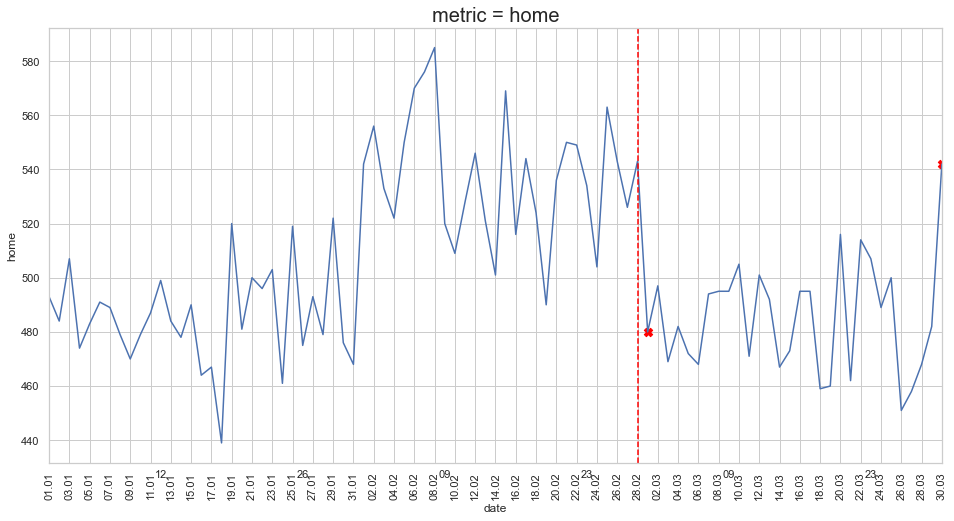

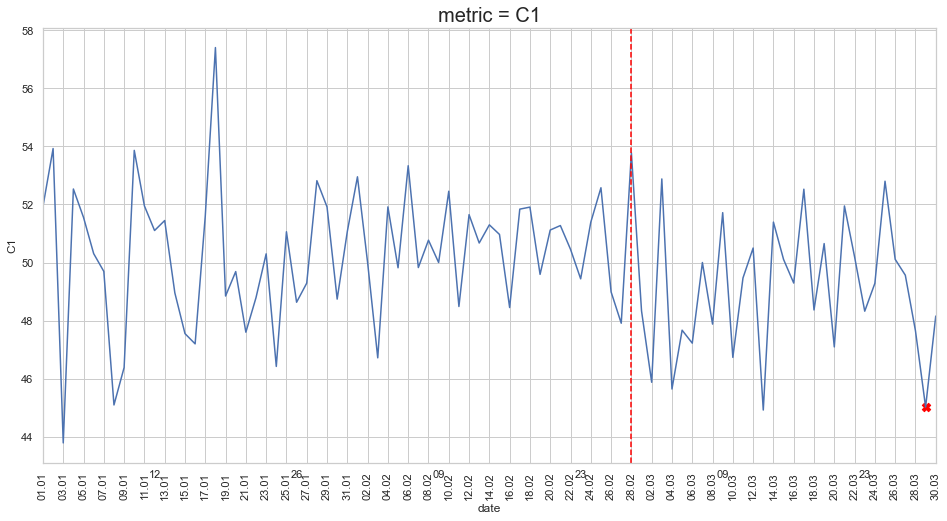

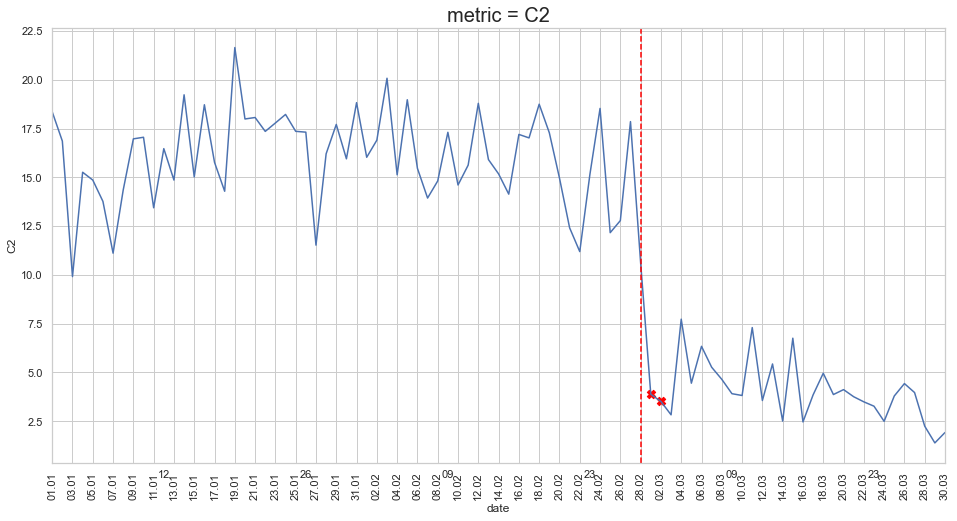

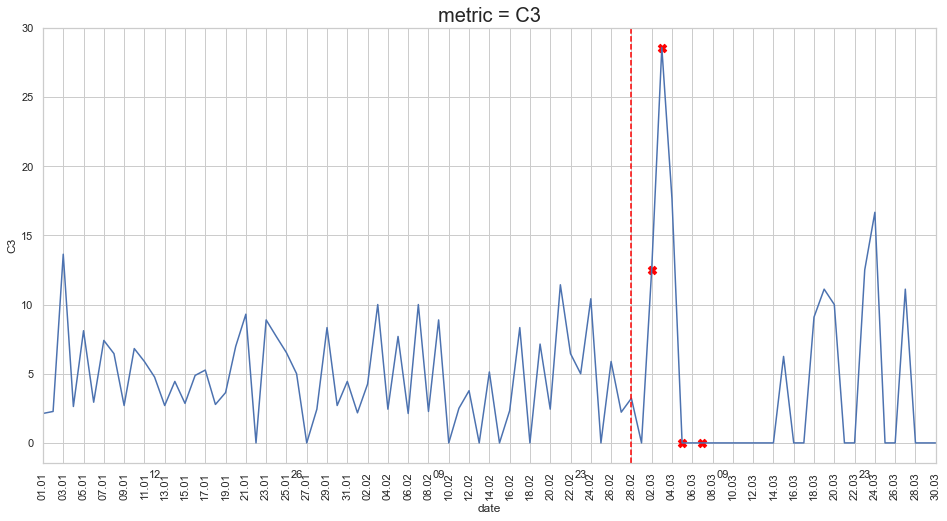

In [524]:
metrics = ['home','C1','C2','C3']
data = df_agg[df_agg['device']=='Desktop'].set_index('date')

for metric in metrics:
    detection_anomaly(data=data, metric=metric, periods=30, cutoff='2015-02-28')